<a href="https://colab.research.google.com/github/yenlung/Py-Math-Book/blob/main/%E5%86%92%E9%9A%AA12_%E5%9F%BA%E5%BA%95%E7%9A%84%E9%AD%94%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

### 1. 二進位數

    0, 1, 2, 3, ...

在二進位中變成:

    0, 1, 10, 11, ...

Python 裡要怎麼轉換呢?

#### 10 進位換 2 進位

In [42]:
bin(87)

'0b1010111'

意思是

$$87 = 1010111_2$$

`0b` 是 Python 的 "提示", 說後面那串是 2 進位數!

### 2 進位換 10 進位

In [43]:
b = bin(87)

In [44]:
b

'0b1010111'

用 `int` 就可以把 10 進位換 2 進位!

    int(b, 0)

後面的 0 是說用字串提示的 (這裡是 `0b`) 轉換。

In [45]:
int(b, 0)

87

我們也可以自行指定基底。

In [46]:
int('1010111', 2)

87

### 另一個轉換方式!

In [47]:
a = 87
print(f'a = {a:b}')

a = 1010111


試著把 0 - 15 用 2 進位表示出來!

In [48]:
for k in range(16):
    print(f'{k} = {k:04b}₂')

0 = 0000₂
1 = 0001₂
2 = 0010₂
3 = 0011₂
4 = 0100₂
5 = 0101₂
6 = 0110₂
7 = 0111₂
8 = 1000₂
9 = 1001₂
10 = 1010₂
11 = 1011₂
12 = 1100₂
13 = 1101₂
14 = 1110₂
15 = 1111₂


### 2. 讀心術

現在對任一個 1-15 間的數, 比如說 3 的二進位數是 0011, 我們想表示為:

[0, 0, 1, 1]

這樣的串列。這該怎麼做呢? 我們先來試試。

In [52]:
b = '0011'

In [53]:
list(b)

['0', '0', '1', '1']

In [54]:
list(map(int, list(b)))

[0, 0, 1, 1]

這可以, 但有點可怕!!

In [55]:
[int(k) for k in b]

[0, 0, 1, 1]

其實這可愛版好像就可以了! 然後我們做成一個字典, 格式是像這樣:

    {1:[0,0,0,1], 2:[0,0,1,0], ...}

In [56]:
d = {}

for i in range(1, 16):
    b = f'{i:04b}'
    print(b)
    egg = [int(k) for k in b]
    d[i] = egg

0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


檢查看看是不是和我們想的一樣?

In [57]:
d[3]

[0, 0, 1, 1]

請你想一個 1-15 的數字, 然後選出有這個數字的卡片, 我就可以猜到你想的數字!

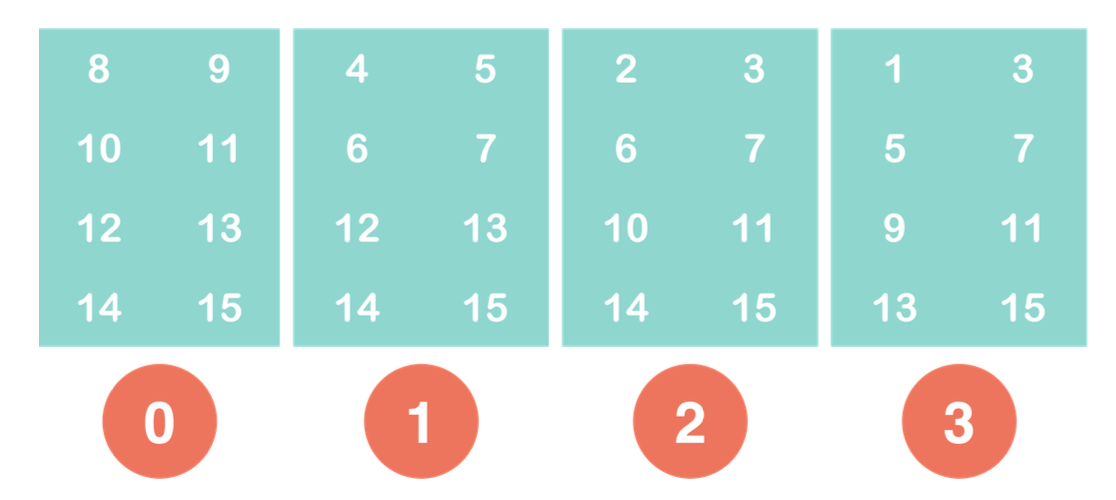

我們可以把這一張張卡片的內容, 做成一個個的串列嗎?

卡片名稱就叫 card[0], card[1], 之類的。

比如 card[0] 要放入 [8, 9, 10, 11, ...]

我們先找來一個數字, 看要怎麼做。

In [58]:
k = 11

d[k]

[1, 0, 1, 1]

這串列就叫 `egg` 好了。

In [59]:
egg = d[k]

如果 egg[i] 是 1 的話, 第 i 張卡片要把我們的 k 加進去!

In [60]:
cards = ([], [], [], [])

for k in range(1, 16):
    egg = d[k]
    for i in range(4):
        if egg[i]:
            cards[i].append(k)

In [61]:
for i in range(4):
    print(f'第 {i} 張卡片是 {cards[i]}')

第 0 張卡片是 [8, 9, 10, 11, 12, 13, 14, 15]
第 1 張卡片是 [4, 5, 6, 7, 12, 13, 14, 15]
第 2 張卡片是 [2, 3, 6, 7, 10, 11, 14, 15]
第 3 張卡片是 [1, 3, 5, 7, 9, 11, 13, 15]


於是你會發現, 要能猜的數字越多, 卡片要越多。

現在因為我們是四位的二進位, 可以表示的數字有:

$$2^4 = 16$$

種。但注意 0 也是一個, 所以大於 0 的數字是 1-15

一個二進位數在電腦裡是一個 bit, 上面就是 4 bits, 如果 8 bits 是

$$2^8 = 256$$

我們也可算算 16 bits 可表示多少個不同情況呢?

In [ ]:
2**16

65536

### 3. 16 進位數

16 進位數一個位數剛好是 2 進位 4 位數。和以前一樣, 如果 10 進位要換 16 進位有兩種方式, 先看第一種。

In [62]:
hex(10)

'0xa'

In [63]:
int('0xa', 0)

10

當然也可以像以前指定基底。

In [64]:
int('a', 16)

10

所以 16 進位代表是 `0x`

In [65]:
k = 255

print(f"二進位 {k:08b} = 16 進位 {k:02x}")

二進位 11111111 = 16 進位 ff


In [66]:
for k in range(256):
    print(f"二進位 {k:08b} = 16 進位 {k:02x}")

二進位 00000000 = 16 進位 00
二進位 00000001 = 16 進位 01
二進位 00000010 = 16 進位 02
二進位 00000011 = 16 進位 03
二進位 00000100 = 16 進位 04
二進位 00000101 = 16 進位 05
二進位 00000110 = 16 進位 06
二進位 00000111 = 16 進位 07
二進位 00001000 = 16 進位 08
二進位 00001001 = 16 進位 09
二進位 00001010 = 16 進位 0a
二進位 00001011 = 16 進位 0b
二進位 00001100 = 16 進位 0c
二進位 00001101 = 16 進位 0d
二進位 00001110 = 16 進位 0e
二進位 00001111 = 16 進位 0f
二進位 00010000 = 16 進位 10
二進位 00010001 = 16 進位 11
二進位 00010010 = 16 進位 12
二進位 00010011 = 16 進位 13
二進位 00010100 = 16 進位 14
二進位 00010101 = 16 進位 15
二進位 00010110 = 16 進位 16
二進位 00010111 = 16 進位 17
二進位 00011000 = 16 進位 18
二進位 00011001 = 16 進位 19
二進位 00011010 = 16 進位 1a
二進位 00011011 = 16 進位 1b
二進位 00011100 = 16 進位 1c
二進位 00011101 = 16 進位 1d
二進位 00011110 = 16 進位 1e
二進位 00011111 = 16 進位 1f
二進位 00100000 = 16 進位 20
二進位 00100001 = 16 進位 21
二進位 00100010 = 16 進位 22
二進位 00100011 = 16 進位 23
二進位 00100100 = 16 進位 24
二進位 00100101 = 16 進位 25
二進位 00100110 = 16 進位 26
二進位 00100111 = 16 進位 27
二進位 00101000 = 16 進位 28
二進位 00101001 = 1

### 4. 十六進位互動小應用

以前可能大家就知道, 一個顏色可以表示成 r, g, b 三個顏色強度的組合。

In [67]:
from ipywidgets import interact, interact_manual

定義一個函數, 畫出某個以 r, g, b 決定顏色的球 (好啦, 我知道其實是盤子)。

In [68]:
def color_ball(r, g, b):
    π = np.pi
    θ = np.linspace(0, 2*π, 200)
    x = np.cos(θ)
    y = np.sin(θ)
    plt.axis('equal')
    plt.axis('off')
    plt.fill(x, y, c=(r,g,b))

試用 

    r=0.3, g=0.5, b=0.3

這個顏色。

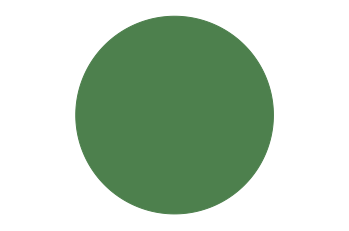

In [69]:
color_ball(0.3, 0.5, 0.3)

做成互動版的, 調出自己愛的顏色。

In [70]:
interact(color_ball, r=(0.,1), g=(0.,1), b=(0.,1));

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

In [71]:
def to_hex(r,g,b):
    rx = hex(int(r*255))[2:]
    gx = hex(int(g*255))[2:]
    bx = hex(int(b*255))[2:]
    print(f'#{rx}{gx}{bx}')

In [72]:
to_hex(0.8, 0.6, 0.6)

#cc9999


### 5. `display` 讓輸出更美!

In [73]:
from IPython.display import display, HTML, Markdown

In [74]:
egg = HTML(r'<h2 style="color:#cc9999;">你好，世界!<h2>')

In [75]:
display(egg)

In [76]:
ham = Markdown(r'''## 大標題
不如來段數學 $f(x) = x^2$''')

In [77]:
display(ham)

## 大標題
不如來段數學 $f(x) = x^2$